# Intro Polynomials

In [1]:
data = {
    'target':[-1,3,2.5,5,4,2,5,4,6,7,6,7,8,7,6,5,4],
    'variable':[-1,0,1,2,3,5,7,9,10,11,12,13,14,15,16,17,18]
}

In [2]:
#import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.DataFrame(data, columns=['target','variable'])
df

,target,variable
0,-1.0,-1
1,3.0,0
2,2.5,1
3,5.0,2
4,4.0,3
5,2.0,5
6,5.0,7
7,4.0,9
8,6.0,10
9,7.0,11


In [4]:
x = df[['variable']]
y = df[['target']]

x.shape

(17, 1)

In [5]:
model = sm.OLS(y,x).fit()
ypred = model.predict(x)


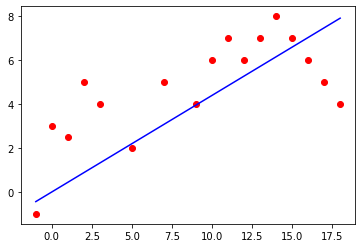

In [7]:
plt.scatter(x, y, color = 'red')
plt.plot(x['variable'], ypred, color = 'blue')

In [9]:
pf2 = PolynomialFeatures(degree=2)
x2 = pf2.fit_transform(x)
x2.shape

(17, 3)

In [10]:
x2 # b0x^0 + b1x1 + b2x2 + b3x3

array([[  1.,  -1.,   1.],
       [  1.,   0.,   0.],
       [  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   5.,  25.],
       [  1.,   7.,  49.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  17., 289.],
       [  1.,  18., 324.]])

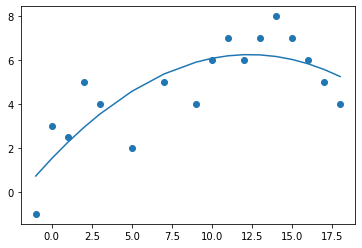

In [11]:
model2 = sm.OLS(y, x2).fit()
ypred = model2.predict(x2)
plt.scatter(x,y)
plt.plot(x['variable'],ypred)

In [12]:
model2.summary()

C:\tools\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     13.52
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           0.000538
Time:                        22:45:58   Log-Likelihood:                -28.258
No. Observations:                  17   AIC:                             62.52
Df Residuals:                      14   BIC:                             65.01
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5251      0.707      2.157      0.049       0.009       3.042
x1             0.7671      0.199      3.862      0.002       0.341       1.193
x2            -0.0311      0.011     -2.729      0.016      -0.056      -0.007
==============================================================================
Omnibus:                        0.547   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.761   Jarque-Bera (JB):                0.609
Skew:                          -0.324   Prob(JB):                        0.738
Kurtosis:                       2.338   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

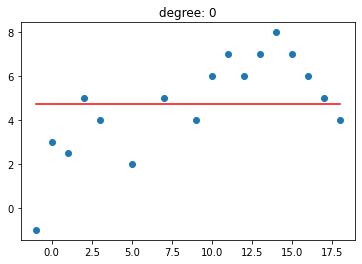

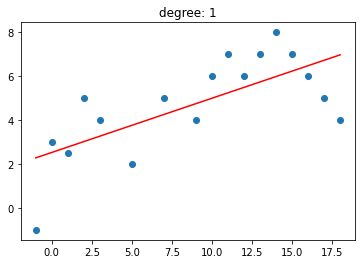

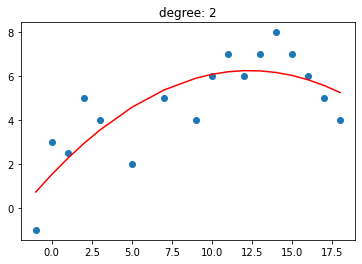

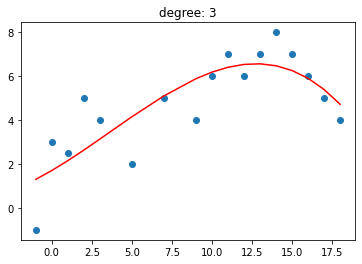

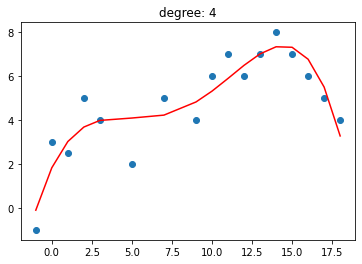

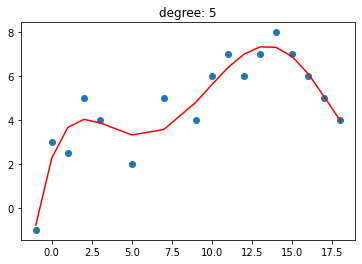

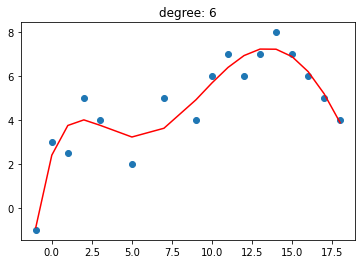

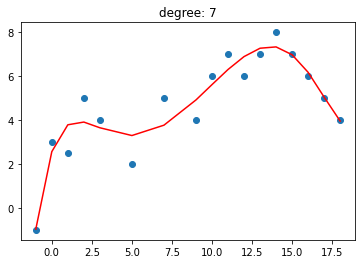

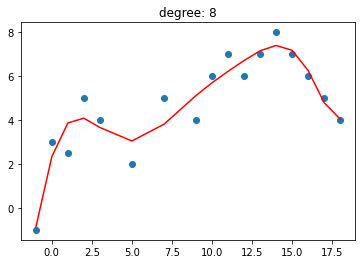

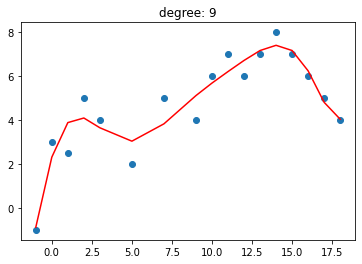

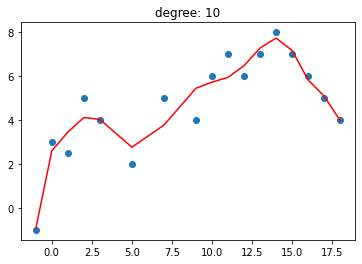

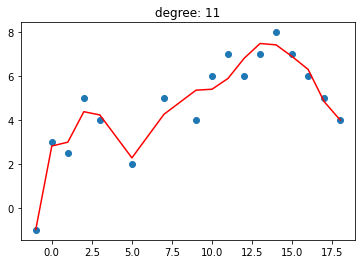

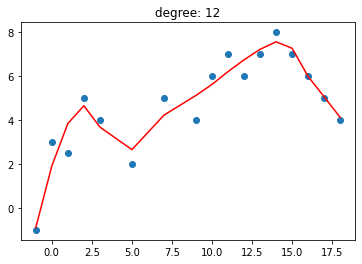

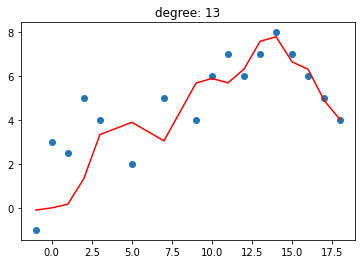

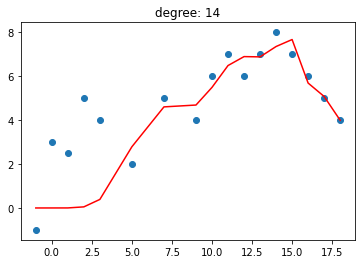

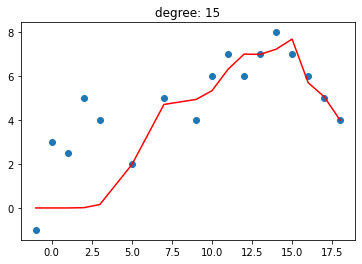

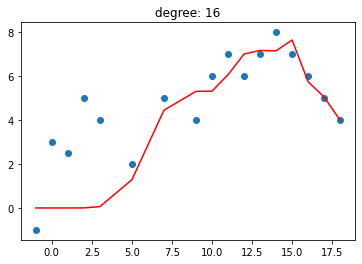

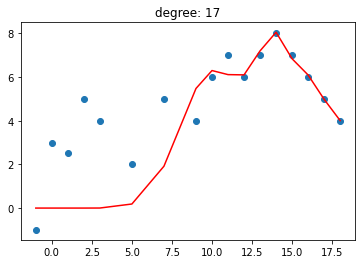

In [13]:
D=[]
BIC=[]
R2=[]
for degree in range(18):
    pf = PolynomialFeatures(degree=degree)
    xp = pf.fit_transform(x)

    model = sm.OLS(y, xp).fit()
    ypred = model.predict(xp)
    plt.scatter(x, y)

    plt.plot(x['variable'], ypred, color='red')
    plt.title('degree: {}'.format(degree))

    D.append(degree)
    BIC.append(model.bic)
    R2.append(model.rsquared)

    plt.show()

In [14]:
stats = {'Degree':D, 'BIC':BIC,'R2':R2}
stats

{'Degree': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 'BIC': [77.63047345185501,
  69.43467804527855,
  65.01488247252664,
  66.83721741696627,
  58.71255832917274,
  55.280372239827805,
  57.871655996147794,
  60.43322416367301,
  62.53388595024953,
  65.36260652509466,
  65.90144684518648,
  64.85485179598905,
  59.08164914895595,
  86.16716401411094,
  91.5808591815383,
  89.49884416067773,
  90.30664316703387,
  92.89059034509859],
 'R2': [0.0,
  0.4773092137410102,
  0.6588431046905769,
  0.678538096757495,
  0.831270252378056,
  0.8832837937589411,
  0.8849330367083305,
  0.8867570942111433,
  0.8915332307068778,
  0.891561892575883,
  0.905252405794003,
  0.9245860380560723,
  0.9114673775580097,
  0.48544817038519006,
  0.292491994292957,
  0.26052750929646684,
  0.22454134267072923,
  0.09724467116126556]}

In [15]:
table = pd.DataFrame(stats, columns=['Degree', 'BIC', 'R2'])
table

,Degree,BIC,R2
0,0,77.630473,0.000000
1,1,69.434678,0.477309
2,2,65.014882,0.658843
3,3,66.837217,0.678538
4,4,58.712558,0.831270
5,5,55.280372,0.883284
6,6,57.871656,0.884933
7,7,60.433224,0.886757
8,8,62.533886,0.891533
9,9,65.362607,0.891562


Text(0, 0.5, 'BIC')

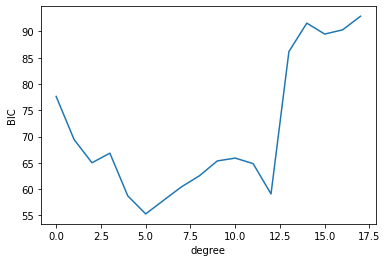

In [16]:
plt.plot('Degree', 'BIC', data=stats)
plt.xlabel(xlabel='degree')
plt.ylabel(ylabel='BIC')
